In [14]:
import pydot
import graphviz
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons, make_circles

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Example 1: Indians Diabetes Data

In [4]:
data_diabetes = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

In [5]:
X, y = data_diabetes[:,0:8], data_diabetes[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Design network architecture and compile it

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense( 1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit model

In [9]:
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

### Evaluate performance

In [10]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 164us/step

acc: 75.00%


## Example 2: Moons & circles datasets

In [51]:
(moon_x,moon_y) = make_moons(n_samples=10000, noise=0.05, random_state=42)
(circle_x,circle_y) = make_circles(n_samples=10000, noise=0.025, random_state=42)

moon_x_train, moon_x_test, moon_y_train, moon_y_test = train_test_split(moon_x,moon_y)
circle_x_train, circle_x_test, circle_y_train, circle_y_test = train_test_split(circle_x, circle_y)

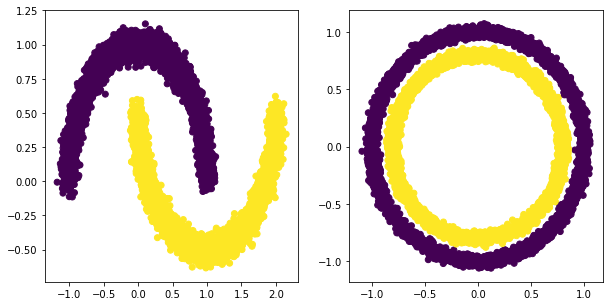

In [45]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].scatter(moon_x[:,0], moon_x[:,1], c = moon_y)
axes[1].scatter(circle_x[:,0], circle_x[:,1], c = circle_y)
plt.show()

In [47]:
model_moons = Sequential()
model_moons.add(Dense(12, input_dim=2, activation='relu'))
model_moons.add(Dense(12, activation='relu'))
model_moons.add(Dense( 1, activation='sigmoid'))
model_moons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model_moons.fit(moon_x, moon_y, epochs=150, batch_size=10)

Epoch 1/150
10000/10000 [==============================] - 2s 239us/step - loss: 0.2748 - acc: 0.8749
Epoch 2/150
10000/10000 [==============================] - 2s 190us/step - loss: 0.0915 - acc: 0.9685
Epoch 3/150
10000/10000 [==============================] - 2s 167us/step - loss: 0.0234 - acc: 0.9971
Epoch 4/150
10000/10000 [==============================] - 2s 213us/step - loss: 0.0061 - acc: 1.0000
Epoch 5/150
10000/10000 [==============================] - 3s 263us/step - loss: 0.0022 - acc: 1.0000
Epoch 6/150
10000/10000 [==============================] - 2s 182us/step - loss: 0.0010 - acc: 1.0000
Epoch 7/150
10000/10000 [==============================] - 2s 163us/step - loss: 5.1013e-04 - acc: 1.0000
Epoch 8/150
10000/10000 [==============================] - 2s 170us/step - loss: 2.8126e-04 - acc: 1.0000
Epoch 9/150
10000/10000 [==============================] - 2s 171us/step - loss: 1.5455e-04 - acc: 1.0000
Epoch 10/150
10000/10000 [==============================] - 2s 167us/s

In [50]:
scores_moons = model_moons.evaluate(moon_x, moon_y)
print("\n%s: %.2f%%" % (model_moons.metrics_names[1], scores_moons[1]*100))

10000/10000 [==============================] - 0s 27us/step

acc: 100.00%


In [53]:
model_moons.fit(moon_x_train, moon_y_train, epochs=150, batch_size=10, verbose=0)

In [54]:
scores_moons = model_moons.evaluate(moon_x_test, moon_y_test)
print("\n%s: %.2f%%" % (model_moons.metrics_names[1], scores_moons[1]*100))

2500/2500 [==============================] - 0s 21us/step

acc: 100.00%


In [55]:
model_circles = Sequential()
model_circles.add(Dense(12, input_dim=2, activation='relu'))
model_circles.add(Dense(12, activation='relu'))
model_circles.add(Dense( 1, activation='sigmoid'))
model_circles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model_circles.fit(circle_x_train, circle_y_train, epochs=150, batch_size=10, verbose=0)
scores_circles = model_circles.evaluate(circle_x_test, circle_y_test)
print("\n%s: %.2f%%" % (model_circles.metrics_names[1], scores_circles[1]*100))

2500/2500 [==============================] - 0s 43us/step

acc: 100.00%


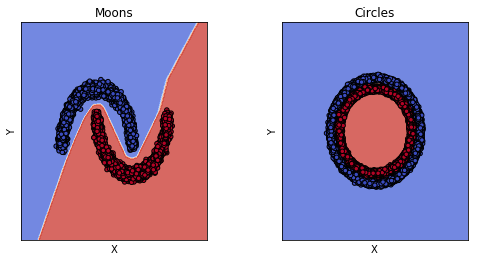

In [71]:
X0_moons, X1_moons = moon_x[:, 0], moon_x[:, 1]
X0_circles, X1_circles = circle_x[:, 0], circle_x[:, 1]

xx_moons, yy_moons = make_meshgrid(X0_moons, X1_moons)
xx_circles, yy_circles = make_meshgrid(X0_circles, X1_circles)

fig, sub = plt.subplots(1, 2, figsize=(8,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)


for clf, title, ax, X0, X1, xx, yy, y in zip([model_moons, model_circles],
                                          ['Moons','Circles'],
                                          sub.flatten(),
                                          [X0_moons, X0_circles],
                                          [X1_moons, X1_circles],
                                          [xx_moons, xx_circles],
                                          [yy_moons, yy_circles],
                                            [moon_y, circle_y]):

    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()